<a href="https://colab.research.google.com/github/anonyblank/ml-zoomcamp-hw/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

--2023-09-23 13:06:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-09-23 13:06:09 (116 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('housing.csv')

<Axes: ylabel='Count'>

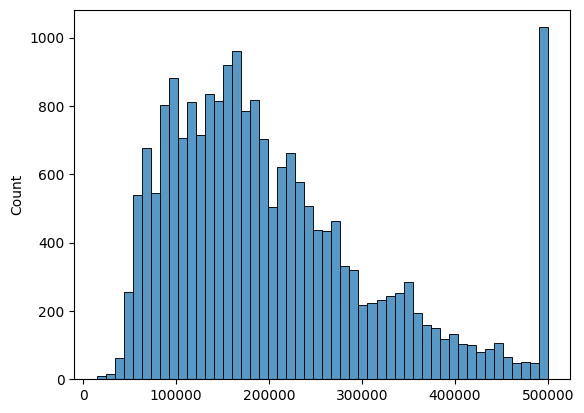

In [4]:
sns.histplot(data.median_house_value.values, bins=50)

In [5]:
filtered = data[data.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

filtered_data = filtered[selected_columns]

# There's one feature with missing values. What is it?

In [6]:
filtered_data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# What's the median (50% percentile) for variable 'population'?

In [7]:
filtered_data.population.median()

1195.0

In [8]:
filtered_data = filtered_data.reset_index(drop=True)
index_in_filtered_data = np.arange(filtered_data.index.shape[0])

In [9]:
np.random.seed(seed=42)
np.random.shuffle(index_in_filtered_data)

In [10]:
num_of_data_in_dataset = len(filtered_data)

num_of_validation_data = int(0.2 * num_of_data_in_dataset)
num_of_test_data = int(0.2 * num_of_data_in_dataset)
num_of_train_data = num_of_data_in_dataset - num_of_validation_data - num_of_test_data

In [11]:
index_in_filtered_data

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [12]:
split_data_to_train = filtered_data.iloc[index_in_filtered_data[:num_of_train_data]] # 0 - 9413
split_data_to_validate = filtered_data.iloc[index_in_filtered_data[num_of_train_data:num_of_train_data + num_of_validation_data]] # 9413 -
split_data_to_test = filtered_data.iloc[index_in_filtered_data[num_of_train_data + num_of_validation_data:]]


In [13]:
labels_for_train = np.log1p(split_data_to_train.median_house_value.values)
labels_for_validation = np.log1p(split_data_to_validate.median_house_value.values)
labels_for_test = np.log1p(split_data_to_test.median_house_value.values)

In [14]:
del split_data_to_train['median_house_value']
del split_data_to_validate['median_house_value']
del split_data_to_test['median_house_value']

In [15]:
def prepare_features(data):
  return data.values



def train_linear_regression(features, labels):
  X = features.copy()
  num_of_examples_in_features = X.shape[0]

  ones = np.ones(num_of_examples_in_features)
  X = np.column_stack([ones, X])

  XT = X.T
  XTX = XT.dot(X)
  XTX_inv = np.linalg.inv(XTX)

  W_Full = XTX_inv @ XT @ labels

  return W_Full


def rmse(predict_labels, labels):
  m = labels.shape[0]
  error = predict_labels - labels

  square_error = error.dot(error)
  mean_square_error = square_error / m
  return np.sqrt(mean_square_error)


In [16]:
# Fill 0

fill_0_data_for_train = split_data_to_train.fillna(0)
fill_0_data_for_validate = split_data_to_validate.fillna(0)


features_to_train = prepare_features(fill_0_data_for_train)
w_full = train_linear_regression(features_to_train, labels_for_train)
w0, W = w_full[0], w_full[1:]

features_to_validate = prepare_features(fill_0_data_for_validate)
pred_labels_for_validation = w0 + features_to_validate.dot(W)
score = rmse(pred_labels_for_validation, labels_for_validation)
round(score, 2)

0.34

In [17]:
# Fill mean

fill_mean_data_for_train = split_data_to_train.fillna(split_data_to_train.total_bedrooms.mean())
fill_mean_data_for_validate = split_data_to_validate.fillna(split_data_to_train.total_bedrooms.mean())


features_to_train = prepare_features(fill_mean_data_for_train)
w_full = train_linear_regression(features_to_train, labels_for_train)
w0, W = w_full[0], w_full[1:]


features_to_validate = prepare_features(fill_mean_data_for_validate)
pred_labels_for_validation = w0 + features_to_validate.dot(W)
score = rmse(pred_labels_for_validation, labels_for_validation)
round(score, 2)

0.34

In [18]:
def train_linear_regression_regularized(features, labels, r=0.01):
  X = features.copy()
  num_of_examples_in_features = X.shape[0]

  ones = np.ones(num_of_examples_in_features)
  X = np.column_stack([ones, X])

  XT = X.T
  XTX = XT.dot(X)

  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)

  W_Full = XTX_inv @ XT @ labels

  return W_Full



In [19]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

fill_0_data_for_train = split_data_to_train.fillna(0)
fill_0_data_for_validate = split_data_to_validate.fillna(0)

features_to_train = prepare_features(fill_0_data_for_train)
features_to_validate = prepare_features(fill_0_data_for_validate)
best_score = float('inf')
best_r = None
for r in r_list:
  w_full = train_linear_regression_regularized(features_to_train, labels_for_train, r=r)
  w0 , W = w_full[0], w_full[1:]

  pred_labels_for_validation = w0 + features_to_validate.dot(W)
  score = rmse(pred_labels_for_validation, labels_for_validation)
  print(r," - ", score)
  if(score < best_score):
    best_score = score
    best_r = r

print("Best r ", best_r)
print("Best score", round(best_score, 2))




0  -  0.3408479034165885
1e-06  -  0.3408479061792101
0.0001  -  0.340848180054261
0.001  -  0.3408506921851553
0.01  -  0.340877930047517
0.1  -  0.3412862041996248
1  -  0.34489583276425
5  -  0.34773980704788987
10  -  0.34831498335209776
Best r  0
Best score 0.34


In [20]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []


for seed in seeds:
  index_in_filtered_data = np.arange(filtered_data.shape[0])

  np.random.seed(seed)
  np.random.shuffle(index_in_filtered_data)

  split_data_to_train = filtered_data.iloc[index_in_filtered_data[:num_of_train_data]]
  split_data_to_validate = filtered_data.iloc[index_in_filtered_data[num_of_train_data:num_of_train_data + num_of_validation_data]]
  split_data_to_test = filtered_data.iloc[index_in_filtered_data[num_of_train_data + num_of_validation_data:]]

  labels_for_train = np.log1p(split_data_to_train.median_house_value.values)
  labels_for_validation = np.log1p(split_data_to_validate.median_house_value.values)
  labels_for_test = np.log1p(split_data_to_test.median_house_value.values)

  del split_data_to_train['median_house_value']
  del split_data_to_validate['median_house_value']
  del split_data_to_test['median_house_value']

  fill_0_data_for_train = split_data_to_train.fillna(0)
  fill_0_data_for_validate = split_data_to_validate.fillna(0)
  fill_0_data_for_test = split_data_to_test.fillna(0)

  features_to_train = prepare_features(fill_0_data_for_train)
  w_full = train_linear_regression(features_to_train, labels_for_train)
  w0, W = w_full[0], w_full[1:]

  features_to_validate = prepare_features(fill_0_data_for_validate)
  pred_labels_for_validation = w0 + features_to_validate.dot(W)
  score = rmse(pred_labels_for_validation, labels_for_validation)
  rmse_scores.append(score)


std = np.std(rmse_scores)
print("Standard Deviation: ", std)
print("Round Number: ", round(std, 3))



Standard Deviation:  0.00546571818101094
Round Number:  0.005


In [21]:
index_in_filtered_data = np.arange(filtered_data.shape[0])

np.random.seed(9)
np.random.shuffle(index_in_filtered_data)

split_data_to_train = filtered_data.iloc[index_in_filtered_data[:num_of_train_data]]
split_data_to_validate = filtered_data.iloc[index_in_filtered_data[num_of_train_data:num_of_train_data + num_of_validation_data]]
split_data_to_test = filtered_data.iloc[index_in_filtered_data[num_of_train_data + num_of_validation_data:]]


com_train_data = pd.concat([split_data_to_train, split_data_to_validate]).reset_index(drop=True).fillna(0)
split_data_to_test = split_data_to_test.fillna(0)

labels_for_com_train = np.log1p(com_train_data.median_house_value.values)
labels_for_test = np.log1p(split_data_to_test.median_house_value.values)

del com_train_data['median_house_value']
del split_data_to_test['median_house_value']

features_to_train = prepare_features(com_train_data)
w_full = train_linear_regression_regularized(features_to_train, labels_for_com_train, r=0.001)
w0 , W = w_full[0], w_full[1:]

features_to_test = prepare_features(split_data_to_test)
pred_labels_for_test = w0 + features_to_test.dot(W)

rmse(pred_labels_for_test, labels_for_test)


0.3349899336614748